# L'underfitting, l'overfitting et les méthodes de régularisation 

NOTE : avant de commencer, pensez à changer votre type d'execution en GPU pour améliorer les performances du notebook et perdre moins de temps en calcul. 

## L'underfitting ou la sous-interprétation
On a plus tôt qu'un réseau simple ne permettait pas de résoudre des tâches complexes : on dit qu'il fait de l'underfitting. Il n'est pas assez compétent ou complexe pour inférer correctement à partir des données. 

Pour sortir de l'underfitting, on a plusieurs solutions : 
 - Utiliser un optimizer plus performant 
 - Augmenter la complexité du modèle 
 
En pratique, on cherchera d'abord à augmenter la complexité du modèle, la recherche d'optimizers spécifiques ou optimaux étant très couteux en temps et en ressource ; surtout si notre réseau ne possède simplement pas le niveau d'abstraction suffisant pour interpréter les données. 

## L'overfitting et comment le combattre  

On a vu précedemment que notre modèle convolutionnel avait un sérieux défaut : si la précision sur le jeu de données d'entrainement grimpait vers 99% sans soucis, la précision sur le jeu de données de validation, elle, allait difficilement au dessus de 70%. 

Ceci est du à un phénomène appelé overfitting. Dit simplement, le modèle "colle trop aux données d'entrainement" : il s'est spécialisé sur les données d'entrainement et sur leurs aléas. Il répond donc moins bien à des données similaires mais ne possédant pas les même biais. 

L'overfitting est une des plaies du machine learning ; le dragon du chevalier de la Data.  Comment essayer d'apprendre sur des données sans "trop bien apprendre" ? Le fait même de réussir une tâche dépend du fait d'apprendre ; mais il semble y avoir un seuil à partir duquel continuer d'apprendre sur nos données d'entrainement nous pénalise sur la tâche que l'on cherche à résoudre. 

Pour réduire l'overfitting, le premier réflexe que l'on peut avoir peut être de réduire la complexité. Après tout, il existe une complexité optimale du modèle pour les données d'entrainement. 

Mais il existe différentes méthodes qui permettent de réduire l'overfitting sans avoir à faire de recherche d'un optimum de complexité. Intuitivement, on peut penser : 


*   A augmenter le nombre de données. Ainsi, le réseau pourra se spécialiser sur un plus grand nombre de données, et donc mieux répondre à sa tâche en général 
*   A arrêter l'entrainement lorsque le réseau fait de l'overfitting. En effet, dès qu'il commence à trop se spécialiser sur les données d'entrainement, il devient plus mauvais sur la tâche en général. Continuer d'apprendre est alors néfaste pour la précision du réseau 
*   A faire varier les jeux d'entrainement pour plusieurs modèles, et croiser ces modèles. Croiser des modèles spécialisés permet de faire un modèle plus général que chacun des modèles spécialisés. 


### Le Data Augmentation 

Le fait d'augmenter notre nombre de données n'est pas toujours possible ; on peut déjà être en train d'utiliser tout notre dataset dans les jeux d'entrainement, de validation et de test. Heureusement, il existe une méthode pour simuler l'augmentation de notre nombre de données : la data augmentation.

La data augmentation est un moyen de combattre l'overfitting en essayant de tirer encore plus de nos données d'entrainement. Pour ce faire, on va 'augmenter' nos datas : appliquer un certain nombre de transformations pour qu'à l'entrainement, notre modèle ne voit jamais la même donnée en entrée !  

Celà permet entre autres : 
- d'éviter de se spécialiser sur des données particulières, puisque le modèle ne voit jamais les mêmes données en entrées 
- de mieux généraliser : les données présentées étant transformées, le modèle a plus de chance de bien réagir à des données similaires mais jamais rencontrées. 


On peut configurer un ImageDataGenerator pour automatiquement générer des données transformées en procédant ainsi : 




```
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```

Si on souhaite modifier nos générateurs de données précédents, on pourra utiliser le code suivant : 

In [1]:
# Load and set up the datas directorys : 

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Let's build a new ImageDataGenerator that will distort the images 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

--2019-11-17 23:25:28--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   180MB/s    in 0.4s    

2019-11-17 23:25:29 (180 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Les données fournies par le générateur seront déformées de diverses manières : 

- elles subiront des rotations (ci-dessus, d'un angle aléatoire compris entre 0 et 40°)
- elles seront décalées verticalement et horizontalement (ici, d'un facteur aléatoire entre 0 et 20%)
- entre 0 et 20% de l'image sera cisaillée 
- un zoom qui sera aléatoirement sélectionné entre 0 et 20% 
- un 'flip horizontal' qui correspond à renverser aléatoirement une partie de l'image horizontalement. 

On peut procéder à une visualisation des distorsions appliquées aux images grâce à la méthode `flow` de `ImageDataGenerator`: 


Using TensorFlow backend.


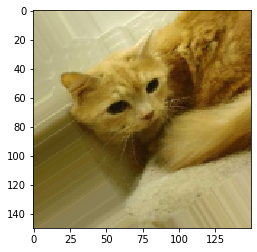

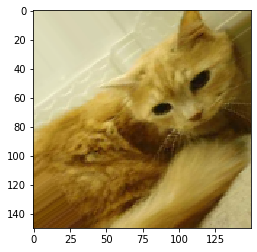

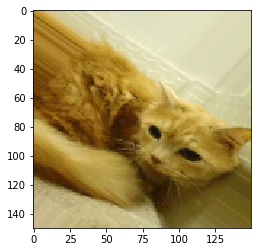

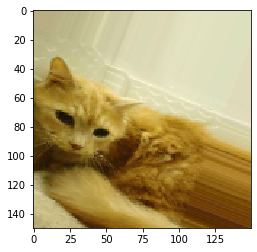

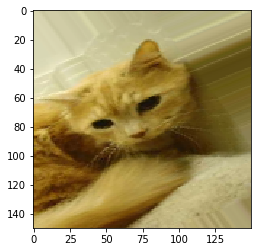

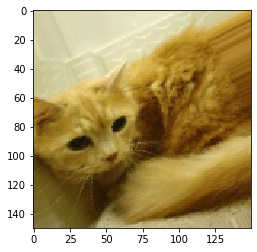

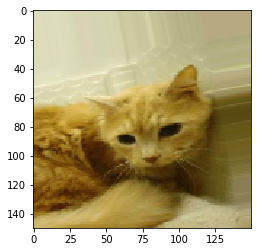

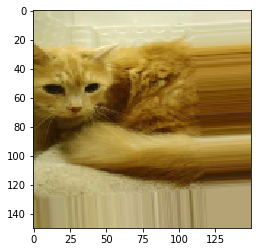

In [2]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path=fnames[3]
img = image.load_img(img_path,target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) +x.shape)
i=0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i%8 ==0 :
        break
plt.show()

Ces images qui sont fournies sont donc proches des images initiales mais les déformations permettent d'augmenter la généralisation du modèle. 

### Le Dropout 

Le dropout est une méthode de régularisation qui consiste à 'abandonner' une certaine partie des unités du réseaux de neurone. Ces unités sont tirées aléatoirement, ce qui permet de faire varier la configuration du modèle au fur et à mesure de l'entrainement. Chaque 'passe' d'entrainement est ainsi soumise à un réseau différent, ce qui est assimilable à un phénomène de cross-validation opéré à l'intérieur du modèle. 

Cette cross-validation permet de limiter la sur-interprétation des données, puisque le modèle présenté aux données diffère à chaque étape. Si le principe est surprenant, il est extrêmement efficace et permet de beaucoup limiter les phénomènes d'overfitting. 

Attention cependant : si on abandonne 'trop' de données, il se peut que l'on limite nos capacités à apprendre. Mieux vaut être prudent et ne pas dépasser 50%... (Encore une bonne pratique ! )

Pour ajouter une couche de Dropout, on procède ainsi : 


```
model.add(keras.layers.Dropout(0.3))

```

Cette déclaration permettra de faire un abandon de 30% des unités de la couche. 
Elle s'ajoute après les couches auxquelles on souhaite l'appliquer. 




### S'arrêter à temps 

On a mentionné le fait d'arrêter l'entrainement dès qu'on détectait l'overfitting, afin de limiter la décadence du modèle. 

En principe, on comprends comment faire : comparer les valeurs de loss sur le jeu de validation après chaque epoch avec les epochs précédentes et mettre un stop lorsque la loss ne s'améliore plus. 

Oui mais ... celà requiert de pouvoir faire des comparaisons sur les valeurs de l'entrainement... pendant l'entrainement ! 

Heureusement, il existe un outil pour ça ... les **Callbacks** ! 

Les callbacks sont des moyens de monitorer ce qui se passe pendant l'entrainement et d'interagir avec celui-ci pendant son exécution. Quand on lance des entrainements qui peuvent durer plusieurs jours, il est important de pouvoir contrôler les avancées régulièrement... 

Voici quelques callbacks courants implémentés dans keras : 
*   **Model ckeckpoint** : permet de sauvegarder l'état des poids à différents moments dans l'entrainement 
*    **Early stopping** : Permet d'interrompre l'entrainement quand la validation loss ne s'améliore plus 
*    **Dynamical parametyer adjustment** permet de modifier des variables, comme la learning rate ou l'optimizer, durant l'entrainement. 
*    **Logging** : permet de connaitre l'état des différentes variables durant l'entrainement et de les afficher ou de les sauvegarder. La barre de progression qui s'affiche lors d'un entrainement en fait partie ! 

On ajoute des callbacks de la manière suivante : 

- on les déclare dans une liste : 



```
callbacks=[
           keras.callbacks.EarlyStopping(
               monitor='acc',
               patience=3
           )
]
```
- puis on les ajoute lorsque l'on lance l'entrainement : 



```
history = conv_model.fit_generator(
      train_generator,
      steps_per_epoch=100, 
      epochs=epochs,
      callbacks=callbacks,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)
```

Pour prendre connaissance de tous les callbacks déjà implémentés, il est conseillé de visiter la documentation sur keras.io ! 
Il est bien sur aussi possible de désigner ses propres callbacks, mais c'est une autre histoire ! 

Passons à la suite ! 




# Implémenter la lutte contre l'overfitting 

A vous de jouer ! 
Vous pouvez manipuler le réseau ci-dessous pour y ajouter les trois méthodes que nous avons citées ... et vous essayer à de nouvelles combinaisons ! 

Game on ! 





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 87617     
Total params: 88,065
Trainable params: 88,065
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/15





 - 22s - loss: 0.8542 - acc: 0.5350 - val_loss: 0.6766 - val_acc: 0.5940
Epoch 2/15
 - 15s - loss: 0.6804 - acc: 0.5875 - val_los

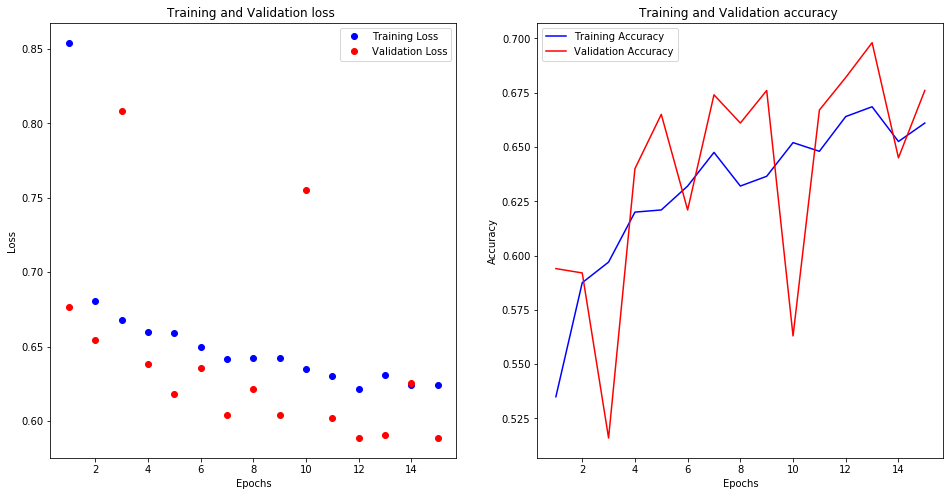

In [3]:
# Paramètres modifiables 
epochs = 15
nodes = 128 
from tensorflow.keras.optimizers import RMSprop
import keras
import matplotlib.pyplot as plt 
from keras import models 
from keras import layers 



conv_model = models.Sequential()
conv_model.add(layers.Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
conv_model.add(layers.MaxPooling2D(2))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dense(1,activation='sigmoid'))

conv_model.summary()
conv_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])


history = conv_model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

history_dict = history.history 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.rcParams['figure.figsize'] = (16,8) # Make the figures a bit bigger
fig,(ax1,ax2,) = plt.subplots(1,2)

x = range(1,epochs+1)
ax1.plot(x,loss_values,'bo',label='Training Loss')
ax1.plot(x,val_loss_values,'ro',label='Validation Loss')
ax1.set_title('Training and Validation loss ')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()


ax2.plot(x,acc_values,'b',label='Training Accuracy')
ax2.plot(x,val_acc_values,'r',label='Validation Accuracy')
ax2.set_title('Training and Validation accuracy ')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

## Améliorer encore le modèle 

Il existe de nombreux éléments à expérimenter , comme par exemple : 
- d'autres optimizers (sgd , adam, RMSprop et leurs variantes) 
- d'autres valeurs pour les hypers-paramètres (nombre d'epochs, nombre de neurones dans les couches, valeur de dropout, etc...) 
- d'autres types de couches (Average Pooling, BatchNormalization, ...) 
- d'autres arrangements de couches (modules de convolution comportant plus d'une couche convolutionnelle, concaténation de convolution comportant des filtres de taille différentes, etc ...)
- des variations dynamiques de paramères (learning rate variable, ...) 
 